### Credit Risk Analysis

One of the leading banks would like to predict bad customer while customer applying for loan. This model also called as PD Models (Probability of Default)

Credit scoring is perhaps one of the most "classic" applications for predictive modeling, to predict whether or not credit extended to an applicant will likely result in profit or losses for the lending institution. There are many variations and complexities regarding how exactly credit is extended to individuals, businesses, and other organizations for various purposes (purchasing equipment, real estate, consumer items, and so on), and using various methods of credit (credit card, loan, delayed payment plan). But in all cases, a lender provides money to an individual or institution, and expects to be paid back in time with interest commensurate with the risk of default. Credit scoring is the set of decision models and their underlying techniques that aid lenders in the granting of consumer credit. These techniques determine who will get credit, how much credit they should get, and what operational strategies will enhance the profitability of the borrowers to the lenders. Further, they help to assess the risk in lending. Credit scoring is a dependable assessment of a person’s credit worthiness since it is based on actual data.

A lender commonly makes two types of decisions: first, whether to grant credit to a new applicant, and second, how to deal with existing applicants, including whether to increase their credit limits. In both cases, whatever the techniques used, it is critical that there is a large sample of previous customers with their application details, behavioral patterns, and subsequent credit history available. Most of the techniques use this sample to identify the connection between the characteristics of the consumers (annual income, age, number of years in employment with their current employer, etc.) and their subsequent history.

Typical application areas in the consumer market include: credit cards, auto loans, home mortgages, home equity loans, mail catalog orders, and a wide variety of personal loan products.


#### Feature Description

    age - Age of Customer
    ed - Eductation level of customer
    employ: Tenure with current employer (in years)
    address: Number of years in same address
    income: Customer Income
    debtinc: Debt to income ratio
    creddebt: Credit to Debt ratio
    othdebt: Other debts
    default: Customer defaulted in the past (1= defaulted, 0=Never defaulted) 

In [ ]:
# bankloan_data.csv  - Train file
# bankdata_test.csv  - Test file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bankloan_data.csv')
df.drop()
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
df.shape

(700, 10)

In [4]:
df.isnull().sum()

Unnamed: 0    0
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default       0
dtype: int64

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape

(700, 9)

In [7]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [9]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [10]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

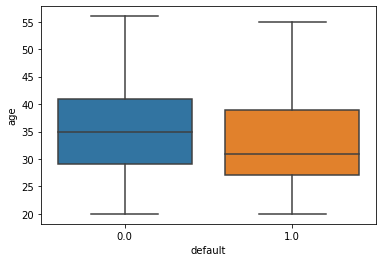

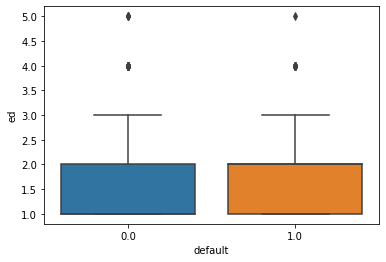

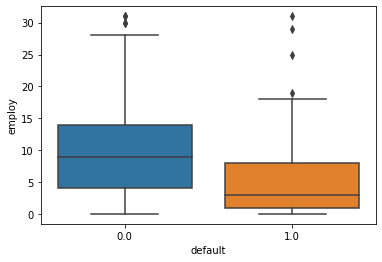

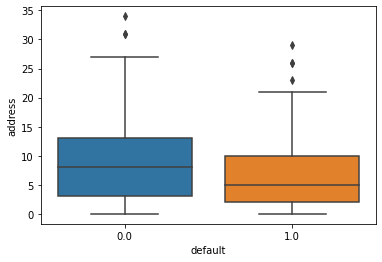

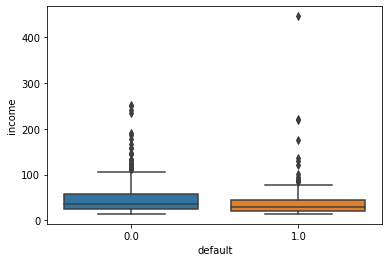

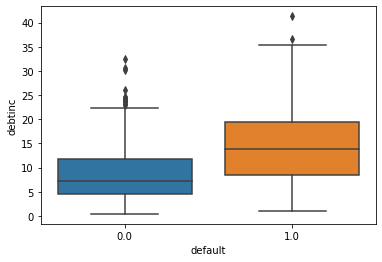

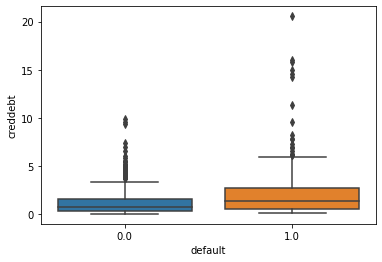

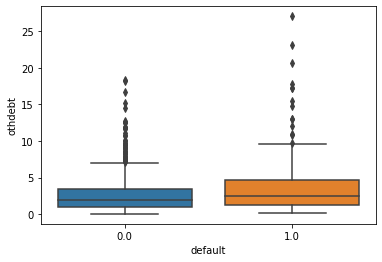

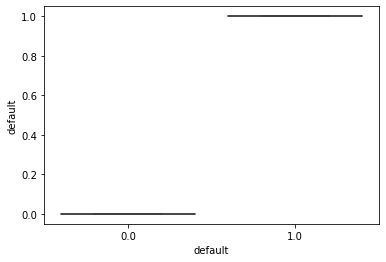

In [11]:
for i in df.columns:
    sns.boxplot(x = df['default'], y=df[i])
    plt.show()

In [12]:
corr = df.corr()
corr

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


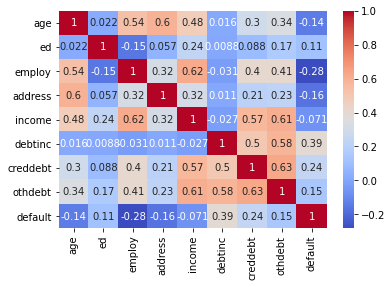

In [16]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### Handling Outliers

In [19]:
df.describe(percentiles=[0.1,0.3,0.5,0.95,0.97,0.98]).T

,count,mean,std,min,10%,30%,50%,95%,97%,98%,max
age,700.0,34.860000,7.997342,20.000000,25.000000,29.000000,34.000000,49.000000,51.000000,52.000000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,1.000000,4.000000,7.000000,21.050000,23.000000,24.000000,31.00000
address,700.0,8.278571,6.824877,0.000000,1.000000,3.000000,7.000000,22.000000,24.030000,25.020000,34.00000
income,700.0,45.601429,36.814226,14.000000,19.000000,26.000000,34.000000,113.000000,129.000000,148.180000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,2.900000,5.800000,8.600000,23.800000,25.709000,27.716000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.170020,0.440418,0.854869,5.098264,6.236958,7.394810,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,0.562232,1.165766,1.987567,9.501648,11.728490,12.960384,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000


In [24]:
def outlier_treatment(x):
    x.clip(upper=x.quantile(0.98))
    x.clip(lower=x.quantile(0.02))
    return x

In [25]:
# df_clean = df.apply(outlier_treatment)

# OR

df_clean = df.apply(lambda x : outlier_treatment(x))

In [26]:
df_clean.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [27]:
x = df.drop('default',axis=1)
y = df['default']
print(x.shape)
print(y.shape)

(700, 8)
(700,)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,roc_curve

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(525, 8)
(175, 8)
(525,)
(175,)


### Model Building

In [33]:
from sklearn.linear_model import LogisticRegression

In [40]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [41]:
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))

Training score 0.819047619047619
Testing score 0.7942857142857143


In [42]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]


In [43]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[122   7]
 [ 29  17]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       129
         1.0       0.71      0.37      0.49        46

    accuracy                           0.79       175
   macro avg       0.76      0.66      0.68       175
weighted avg       0.78      0.79      0.77       175



In [ ]:
# 0 - Non deafulters
# 1 - Defaulters
# cm = [TP=122 FN=7]
#      [FP=29 TN=17]
# Pre = TP/(TP+FP) = 122/(122+29)
# Rec = TP/(TP+FN) = 122/(122+7)
# TP + FP = sum of all predicted positive cases 
# TP + FN = Sum of all actual positive cases

# Pre = TN/(TN+FN) = 17/(17+7)
# Rec = TN/(TN+FP) = 17/(17+29)
# TN + FN = sum of all predicted negative cases 
# TN + FP = Sum of all actual negative cases

In [48]:
print(122/(122+29))  # pre0
print(17/(7+17))     # pre1

print(122/(122+7))   # rec0
print(17/(17+29))    # rec1


0.8079470198675497
0.7083333333333334
0.9457364341085271
0.3695652173913043


In [58]:
test = pd.read_csv('bankdata_test.csv')
test.head()

,age,ed,employ,address,income,debtinc,creddebt,othedebt
0,32,4,7,6.0,73,1.40,3.00,2.34
1,45,4,15,15.0,120,4.78,4.67,5.78
2,32,4,7,6.0,73,10.34,3.00,2.34
3,24,3,2,2.5,25,32.00,8.00,0.00
4,32,1,7,5.0,105,12.00,9.00,3.00


In [59]:
test.shape

(5, 8)

In [60]:
ypred_test  = m1.predict(test)
print(ypred_test)

[0. 0. 0. 1. 1.]


In [62]:
m1.predict_proba(test)

array([[0.76970119, 0.23029881],
       [0.92237551, 0.07762449],
       [0.59981062, 0.40018938],
       [0.00335276, 0.99664724],
       [0.05879463, 0.94120537]])

#### Training ML model on entire data

In [64]:
m3 = LogisticRegression(max_iter=1000)
m3.fit(x,y)

LogisticRegression(max_iter=1000)

In [65]:
ypred_test2  = m3.predict(test)
print(ypred_test2)

[0. 0. 0. 1. 1.]


#### AUC_ROC curve

### SGDClassifier

In [49]:
from sklearn.linear_model import SGDClassifier

In [50]:
m2 = SGDClassifier(max_iter=250,eta0=0.001,loss='log')
m2.fit(x_train,y_train)

SGDClassifier(eta0=0.001, loss='log', max_iter=250)

In [52]:
print('Training score',m2.score(x_train,y_train))
print('Testing score',m2.score(x_test,y_test))

Training score 0.819047619047619
Testing score 0.8057142857142857


In [54]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]


In [55]:
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2))

[[127   2]
 [ 32  14]]
              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88       129
         1.0       0.88      0.30      0.45        46

    accuracy                           0.81       175
   macro avg       0.84      0.64      0.67       175
weighted avg       0.82      0.81      0.77       175

